In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/master_df.csv')

C:\Users\sahil\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Availability of assets: Scooter/Motorcycle/Moped,Availability of assets: Car/Jeep/Van,Availability of assets: Households with TV,Availability of assets: None of the assets specified in col. 10 to 19,Households by Type of Structure of Census Houses: Permanent,Households by Type of Structure of Census Houses: Semi-Permanent,Households by Type of Structure of Census Houses: Total Temporary,Households by Type of Structure of Census Houses: Serviceable,Households by Type of Structure of Census Houses: Non-Serviceable,Households by Type of Structure of Census Houses: Unclassifiable
0,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,0,Nicobars,0,0,District - Nicobars,Total,...,20.0,1.9,0.8,10.4,31.4,65.1,1.3,0.6,0.8,2.1
1,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,0,Nicobars,0,0,District - Nicobars,Rural,...,20.0,1.9,0.8,10.4,31.4,65.1,1.3,0.6,0.8,2.1
2,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,5916,Car Nicobar,0,0,Sub-Dist - Car Nicobar,Total,...,25.4,3.0,0.7,10.0,16.6,82.2,0.6,0.1,0.5,0.5
3,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,5916,Car Nicobar,0,0,Sub-Dist - Car Nicobar,Rural,...,25.4,3.0,0.7,10.0,16.6,82.2,0.6,0.1,0.5,0.5
4,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,5916,Car Nicobar,645012,0,Mus,Rural,...,20.2,3.6,0.3,11.0,17.1,81.8,1.0,0.5,0.5,0.0


## What states have the highest and lowest electrical household items?

In [5]:
electrical_columns = [
    'Availability of assets: Radio/Transistor',
    'Availability of assets: Television',
    'Availability of assets: Computer/Laptop (With Internet)', 
    'Availability of assets: Computer/Laptop (Without Internet)',
    'Availability of assets: Telephone/Mobile Phone (Landline only)',
    'Availability of assets: Telephone/Mobile Phone (Mobile only)', 
    'Availability of assets: Telephone/Mobile Phone (Both)'
]

In [6]:
electrical_df = df[['State Name']+electrical_columns]

In [7]:
electrical_df.head()

,State Name,Availability of assets: Radio/Transistor,Availability of assets: Television,Availability of assets: Computer/Laptop (With Internet),Availability of assets: Computer/Laptop (Without Internet),Availability of assets: Telephone/Mobile Phone (Landline only),Availability of assets: Telephone/Mobile Phone (Mobile only),Availability of assets: Telephone/Mobile Phone (Both)
0,ANDAMAN & NICOBAR ISLANDS,34.0,48.5,0.6,1.7,2.8,62.6,1.5
1,ANDAMAN & NICOBAR ISLANDS,34.0,48.5,0.6,1.7,2.8,62.6,1.5
2,ANDAMAN & NICOBAR ISLANDS,40.5,43.4,0.4,1.6,4.7,56.5,0.9
3,ANDAMAN & NICOBAR ISLANDS,40.5,43.4,0.4,1.6,4.7,56.5,0.9
4,ANDAMAN & NICOBAR ISLANDS,47.3,48.6,0.0,0.5,2.0,73.7,0.3


In [23]:
electrical_final_df = pd.DataFrame(electrical_df.groupby(['State Name']).sum().sum(axis=1)).rename(columns={0:"Electrical Total"})
electrical_final_df['State Name'] = electrical_final_df.index
electrical_final_df = electrical_final_df.reset_index(drop=True)

In [24]:
# State with highest electrical items
electrical_final_df.iloc[electrical_final_df['Electrical Total'].idxmax(),:]

Electrical Total      1.39834e+07
State Name          UTTAR PRADESH
Name: 32, dtype: object

In [25]:
# State with lowest electrical items
electrical_final_df.iloc[electrical_final_df['Electrical Total'].idxmin(),:]

Electrical Total         7465.3
State Name          LAKSHADWEEP
Name: 17, dtype: object

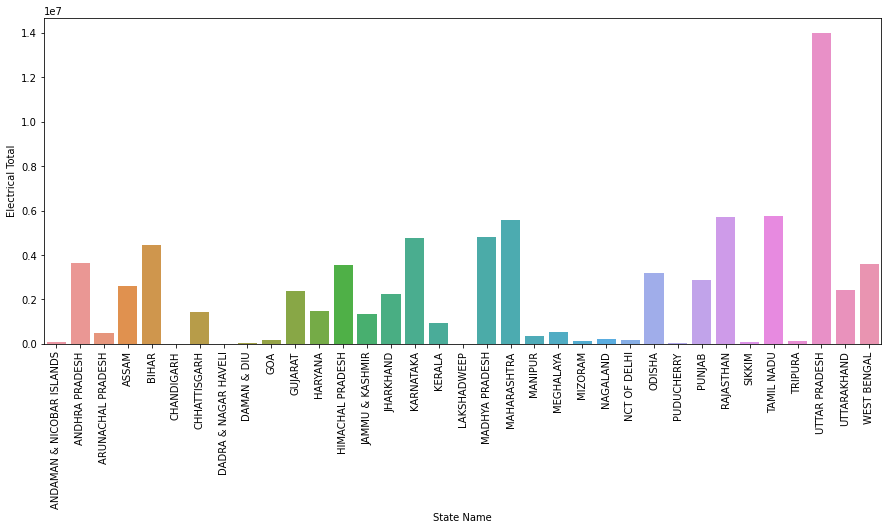

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=electrical_final_df['State Name'], y=electrical_final_df['Electrical Total'])
plt.xticks(rotation=90);

#### Observation
From the above plot we can see that Uttar Pradesh is the state with highest number of electrical household items. The lowest total is that of Lakshadweep

## What does the latrine facilities per state look like?

In [12]:
latrine_df = df[['State Name', 'Number of households having latrine facility within the premises','Number of households not having latrine facility within the premises']]

In [22]:
latrine_final_df = pd.DataFrame(latrine_df.groupby(['State Name']).sum())
latrine_final_df['State Name'] = latrine_final_df.index
latrine_final_df = latrine_final_df.reset_index(drop=True)
latrine_final_df.head()

,Number of households having latrine facility within the premises,Number of households not having latrine facility within the premises,State Name
0,19679.8,23120.2,ANDAMAN & NICOBAR ISLANDS
1,960441.9,2326458.1,ANDHRA PRADESH
2,238515.6,336184.4,ARUNACHAL PRADESH
3,1448498.1,1268101.8,ASSAM
4,845080.7,3564719.2,BIHAR


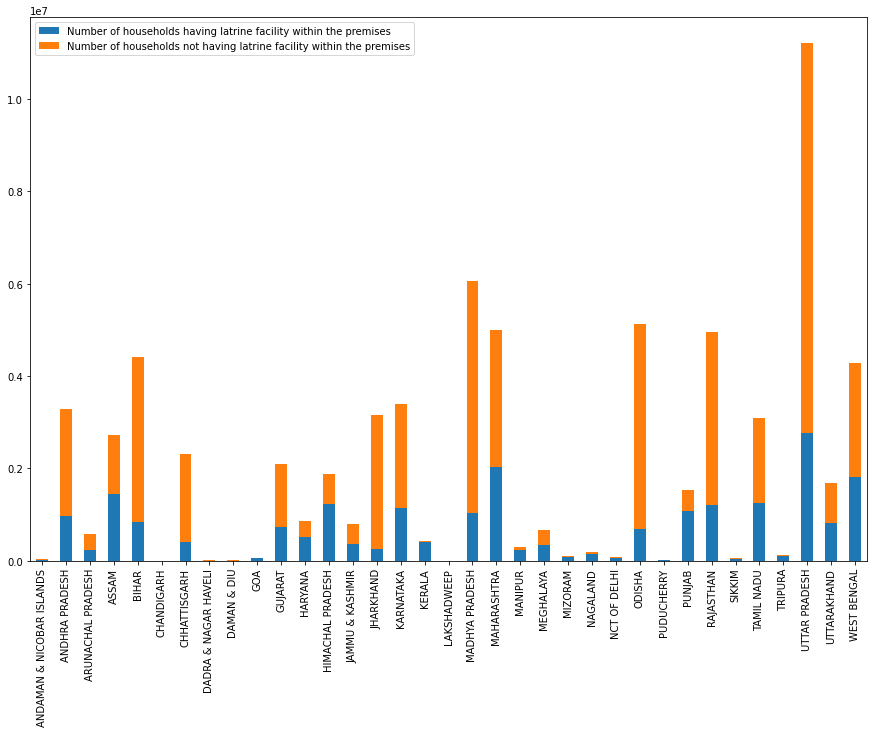

In [34]:
ax = latrine_final_df.plot.bar(stacked=True,figsize=(15,10))
ax.set_xticklabels(latrine_final_df['State Name']);

## What are the various usage of energy across all states?

In [15]:
lighting_columns = [
    'Main Source of lighting: Electricity',
    'Main Source of lighting: Kerosene',
    'Main Source of lighting: Solar energy',
    'Main Source of lighting: Other oil',
    'Main Source of lighting: Any other',
    'Main Source of lighting: No lighting'
]

In [16]:
electricity_df = df[['State Name']+ lighting_columns]
electricity_final_df = pd.DataFrame(electricity_df.groupby(['State Name']).sum())
electricity_final_df['State Name'] = electricity_final_df.index
electricity_final_df = electricity_final_df.reset_index(drop=True)
electricity_final_df.head()

,Main Source of lighting: Electricity,Main Source of lighting: Kerosene,Main Source of lighting: Solar energy,Main Source of lighting: Other oil,Main Source of lighting: Any other,Main Source of lighting: No lighting,State Name
0,27452.3,12982.7,778.9,1190.4,56.3,339.5,ANDAMAN & NICOBAR ISLANDS
1,2810666.0,434527.9,11538.1,10838.9,3089.4,16224.9,ANDHRA PRADESH
2,252025.0,115965.9,37616.3,3362.2,29030.6,136700.4,ARUNACHAL PRADESH
3,725736.3,1926614.0,51160.6,4655.5,2599.0,5829.5,ASSAM
4,620808.0,3729279.1,30005.8,14529.4,11294.7,3860.9,BIHAR
